<a href="https://colab.research.google.com/github/Axjet/Axjet/blob/main/Netflix%20EDA/netflix_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix EDA
## Arindam Sikdar
### Dataset available at: https://www.kaggle.com/shivamb/netflix-shows

# Import Data

In [ ]:
 pip install "jupyterlab>=3" "ipywidgets>=7.6" 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode
#init_notebook_mode(connected=False)
#from IPython.display import HTML, display, IFrame


#pyo.init_notebook_mode()


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#url = 'https://github.com/Axjet/DataCamp/blob/main/Netflix%20EDA/netflix_titles.csv'
#data_import = pd.read_csv(url)
data_import = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/netflix_titles.csv')
data_import

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# High level EDA

In [ ]:
data_import.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#Release year is type int64, converting it to datatime - current format = September 25, 2021 to 09-25-2021 - using the format argument; using strip func to remove extra space
data_import = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/netflix_titles.csv')
data_import['date_added'] = pd.to_datetime(data_import['date_added'].str.strip() , format = "%B %d, %Y")
data_import


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
data_import.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

# Summary statistics 

In [ ]:
#Summary statistics for the dataframe - will work only on Numerical colum
data_import.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Analysis

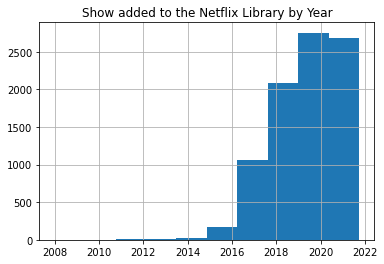

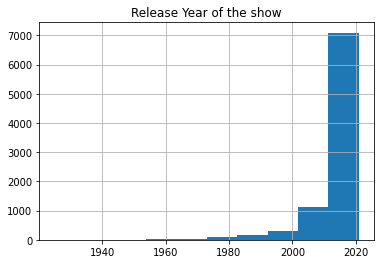

In [ ]:
#In matplotlib
data_import['date_added'].hist()
plt.title('Show added to the Netflix Library by Year')
plt.show()
data_import['release_year'].hist()
plt.title('Release Year of the show')
plt.show()

In [ ]:
#Using plotly for interactive Graph
rl = px.histogram( data_import ,x="release_year")
rl.show()
#rl.write_html("/Python/Netflix EDA/rl.html")

In [ ]:
#checking the older films on Netflix Library
data_import[data_import["release_year"]<= 1943].sort_values('release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,2017-03-31,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,2017-03-31,1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...


## We can infer that most of the have been added to to the Netflix library bewtween 2016-2021 and the library consists of mostly recent movies. Also the show from 1925 seems to be a collection of movies not a single show, the release year doesnt seem accurate

In [ ]:
# Graph for Date added
da = px.histogram( data_import ,x="date_added")
da.show()
#da.write_html('/Python/Netflix EDA/date_addedvcount.html')

In [ ]:
# Making the Graph look better
# Extracting the month for further analysis
data_import["date_added_month"] = data_import["date_added"].dt.month.fillna(0)
da2 = px.histogram( data_import ,x="date_added", color = "date_added_month")
da2.show()
#da2.write_html('/Python/Netflix EDA/date_added2.html')




### There seems to be a pattern in the volume of movies added, seems like most movies are added in the later half of the year, exploring further to check.

In [ ]:
# Ploting by movies added by Months
dam=px.histogram( data_import ,x="date_added_month", color = 'type')
dam.show()
#dam.write_html('/Python/Netflix EDA/dam.html')



### There doesnt seem to be any spike in the number of movies added on a particular month
### Exploring the data set further, this time trying to see if more shows are added on particular date

In [ ]:
data_import["date_added_date"] = data_import["date_added"].dt.day
dad = px.histogram( data_import ,x="date_added_date", color = 'type')
dad.show()
#dad.write_html('/Python/Netflix EDA/dad.html')


### We can observe that Netflix add's new shows on their library on the 1st and 15th day of the month, also more
# String column analysis

In [ ]:
data_import.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_month', 'date_added_date'],
      dtype='object')

In [ ]:
data_import["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
data_import["country"].str.split(',' , expand= True) # Shows the number of countries credited to make a movie, max countries credited to make a movie = 12

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
# Counting how many times a country has been credited
country_count = data_import.copy()
country_count = pd.concat([country_count, data_import['country'].str.split(',', expand=True)], axis = 1)
country_count = country_count.melt(id_vars=['type' , 'title'], value_vars=range(12), value_name='Country')
country_count = country_count[country_count['Country'].notna()]
country_count["Country"] = country_count['Country'].str.strip()
country_count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [ ]:
countryc = px.histogram(country_count , "Country" , color='type').update_xaxes(categoryorder = "total descending")
countryc.show()
#countryc.write_html('/Python/Netflix EDA/countryc.html')


In [ ]:
data_import["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
ratings = px.histogram(data_import , "rating").update_xaxes(categoryorder = "total descending")
ratings.show()
#ratings.write_html('/Python/Netflix EDA/ratings.html')
#HTML(filename='/Python/Netflix EDA/ratings.html')
#IFrame(src='https://github.com/Axjet/DataCamp/blob/main/Netflix-EDA/ratings.html',  width = 1300, height=700)